In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
sample = ["2Mu2E_100GeV_0p25GeV_10mm"]

fileset = utilities.make_fileset(sample, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = [
    "looseBarrelE_matched",
    "barrelE_matched",
    "barrelE_ID-sigmaIetaIeta_matched",
    "barrelE_ID-DPhiIn_matched",
    "barrelE_ID-EtaInSeed_matched",
    "barrelE_ID-Inverse_matched",
    "barrelE_ID-Iso_matched",
    "barrelE_ID-ConversionVeto_matched",
    "barrelE_ID-HE_matched",
    "barrelE_ID-MissingHits_matched",
    # "looseEndcapE"
    # "endcapE",
]
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]
hists = out["2Mu2E_100GeV_0p25GeV_10mm"]["hists"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  looseBarrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaIetaIeta_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-EtaInSeed_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Inverse_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Iso_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-ConversionVeto_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-HE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-MissingHits_matched

Not applying any cuts to the lepton jets for channel  looseBarrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaIetaIeta_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-EtaInSeed_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Inverse_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Iso_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-ConversionVeto_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-HE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-MissingHits_matched

Not applying any cuts to the lepton jets for channel  looseBarrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaIetaIeta_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-EtaInSeed_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Inverse_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Iso_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-ConversionVeto_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-HE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-MissingHits_matched

Not applying any cuts to the lepton jets for channel  looseBarrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaIetaIeta_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-EtaInSeed_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Inverse_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Iso_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-ConversionVeto_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-HE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-MissingHits_matched

Not applying any cuts to the lepton jets for channel  looseBarrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaIetaIeta_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-EtaInSeed_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Inverse_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-Iso_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-ConversionVeto_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-HE_matched

Not applying any cuts to the lepton jets for channel  barrelE_ID-MissingHits_matched

In [3]:
#in each histogram you are able to see each selections of the ID variable cut by changing the channel number to correspond with the selections defined in channel

# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'Δηseed Barrel, n-1 cuts')

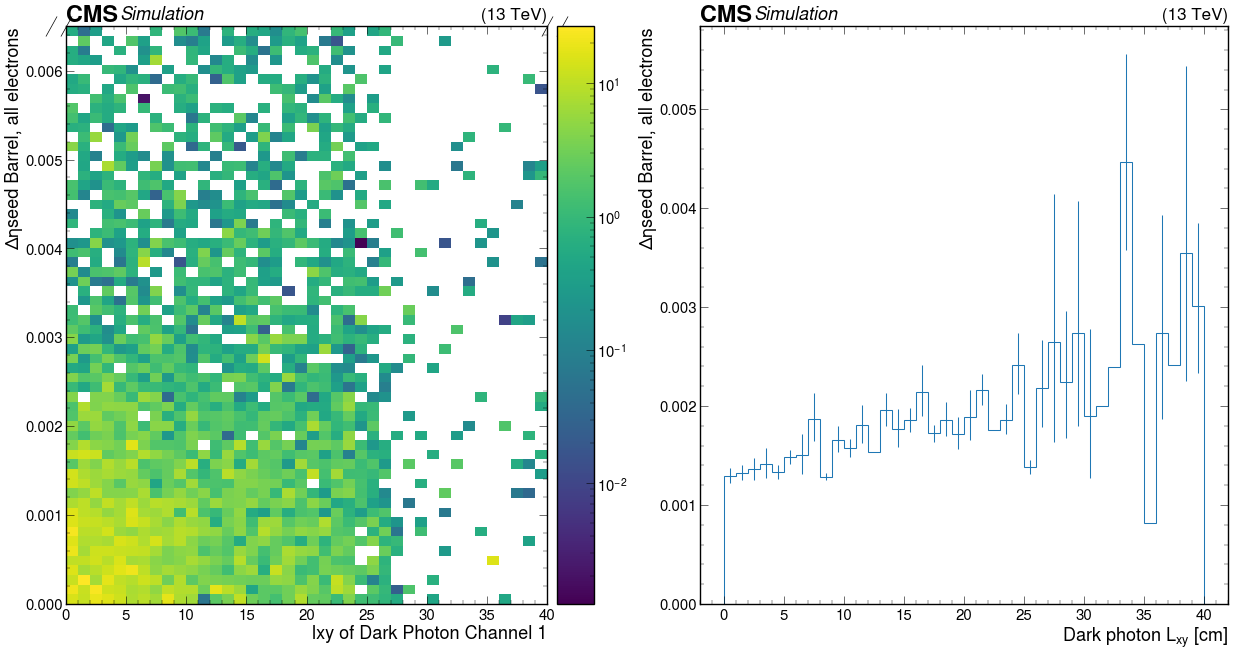

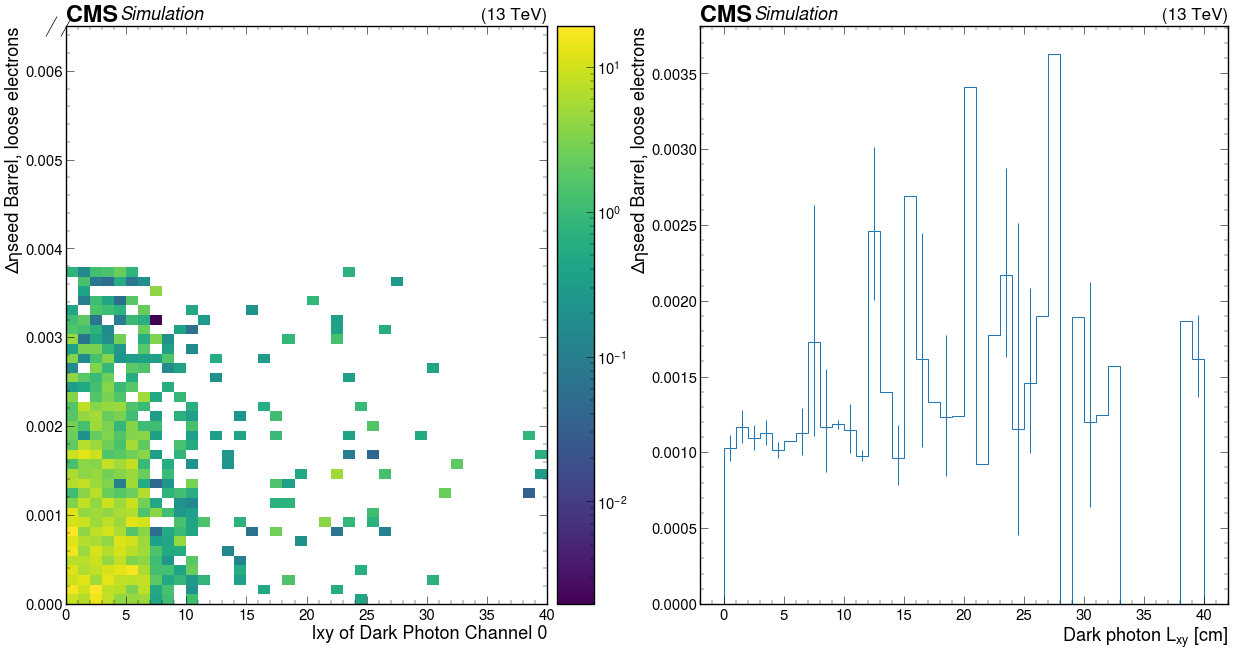

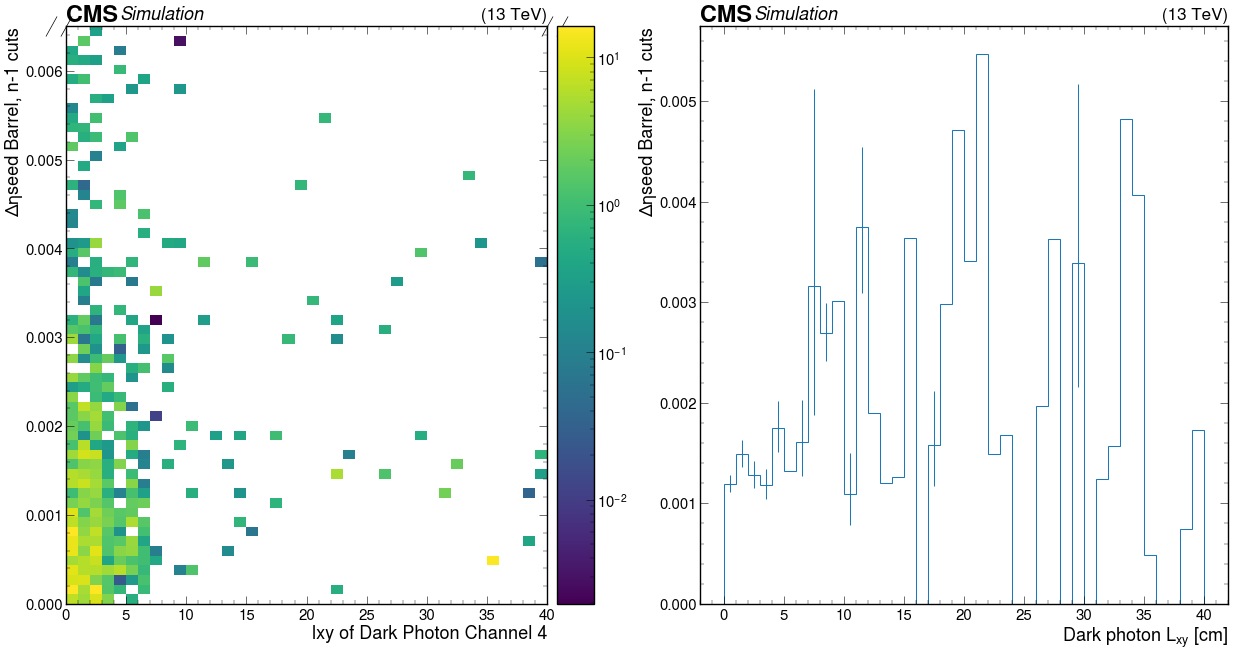

In [4]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δηseed Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :40j, :].profile(axis="electron_GsfEleDEtaInSeedCut"))
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:35]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δηseed Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δηseed Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :40j, :].profile(axis="electron_GsfEleDEtaInSeedCut"))
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(0, 2, sum),:35]) 
plt.ylabel("Δηseed Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[4], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 4")
plt.ylabel("Δηseed Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[4], :40j, :].profile(axis="electron_GsfEleDEtaInSeedCut"))
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(0, 2, sum),:35]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δηseed Barrel, n-1 cuts")

#(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:])

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'Δφin Barrel, n-1 cuts')

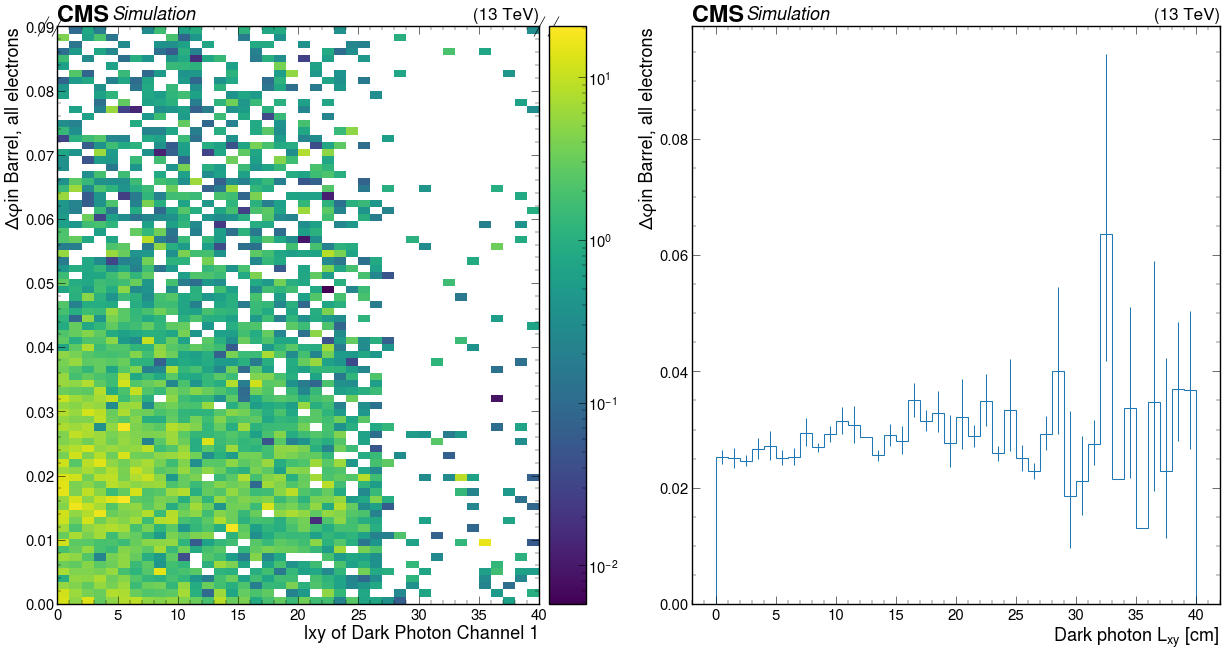

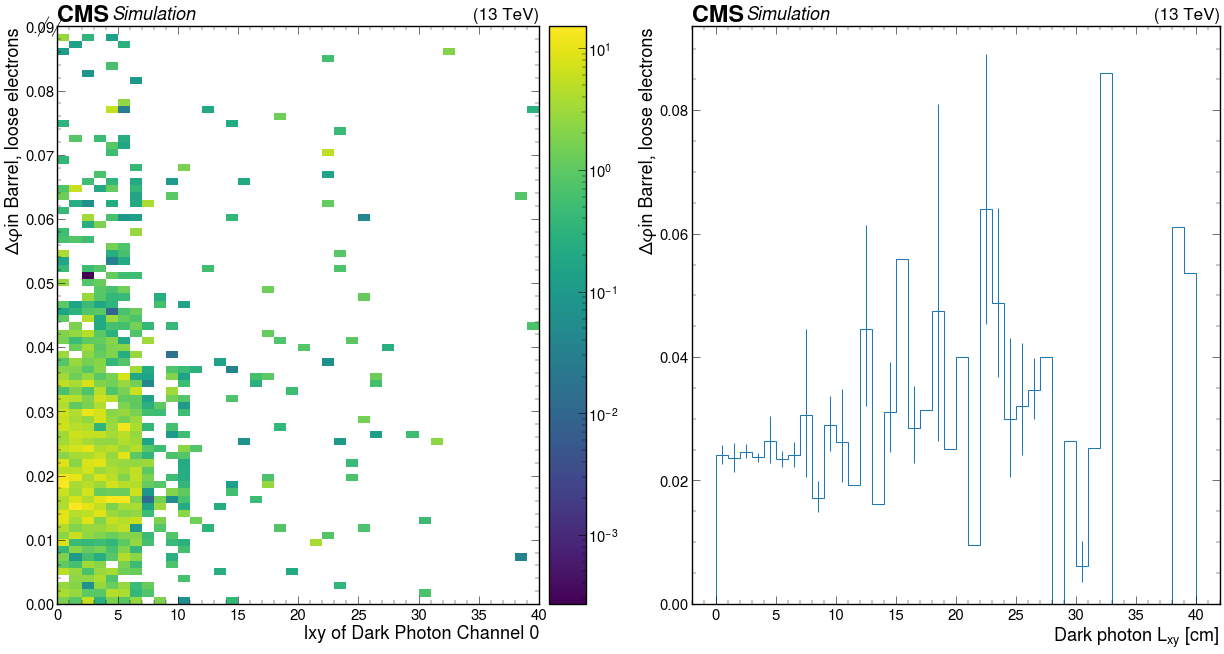

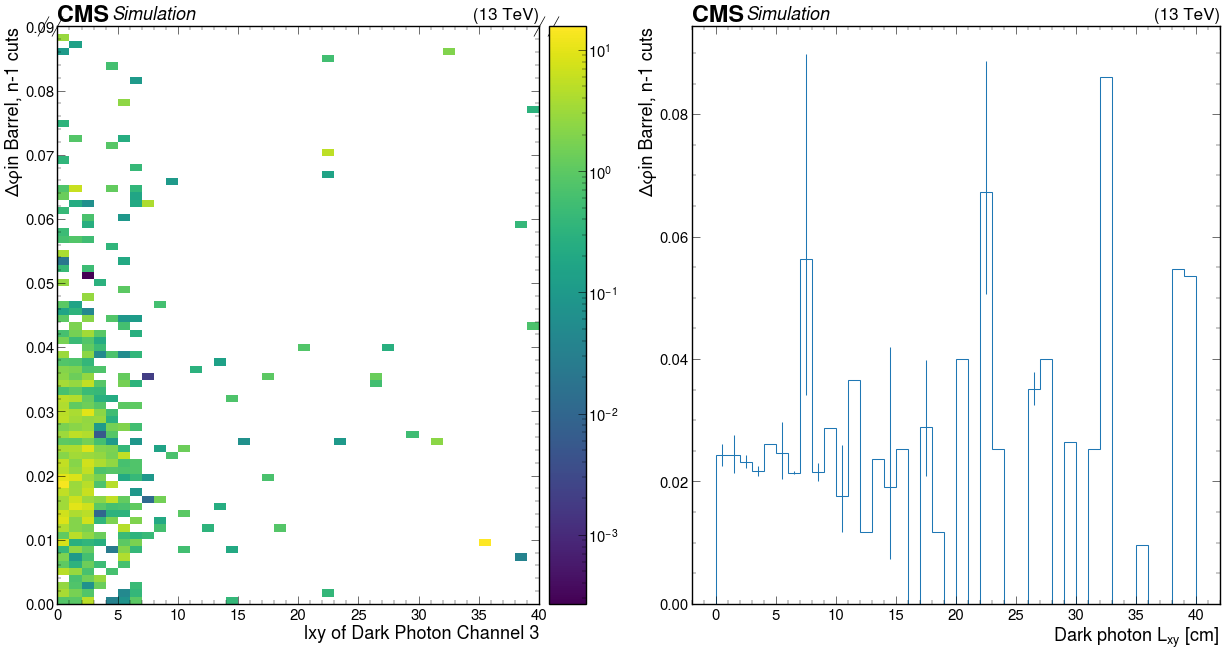

In [5]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δφin Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :40j, :].profile(axis="electron_GsfEleDPhiInCut"))
#print(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:79]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δφin Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δφin Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :40j, :].profile(axis="electron_GsfEleDPhiInCut"))
#print(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:76]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δφin Barrel, loose electrons")


plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Δφin Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3], :40j, :].profile(axis="electron_GsfEleDPhiInCut"))
#print(hists["electron_GsfEleDPhiInCut2d"][channels[4],slice(0, 2, sum),:76]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Δφin Barrel, n-1 cuts")



#(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:])

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, '|1/E - 1/p| Barrel, n-1 cuts')

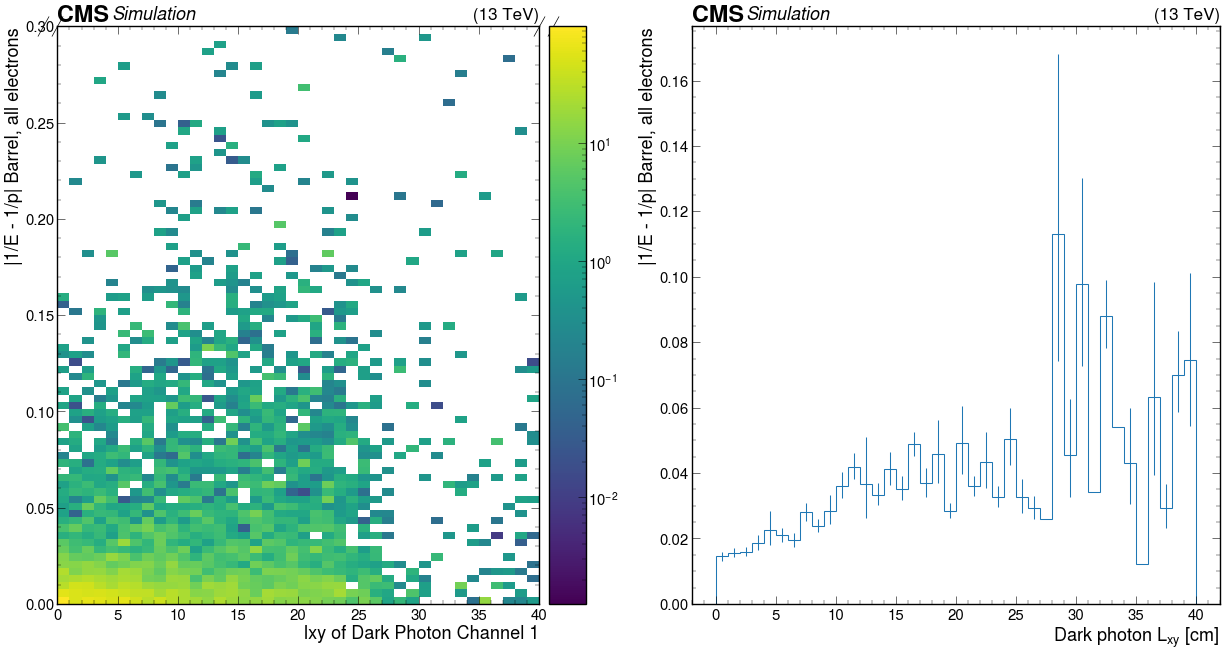

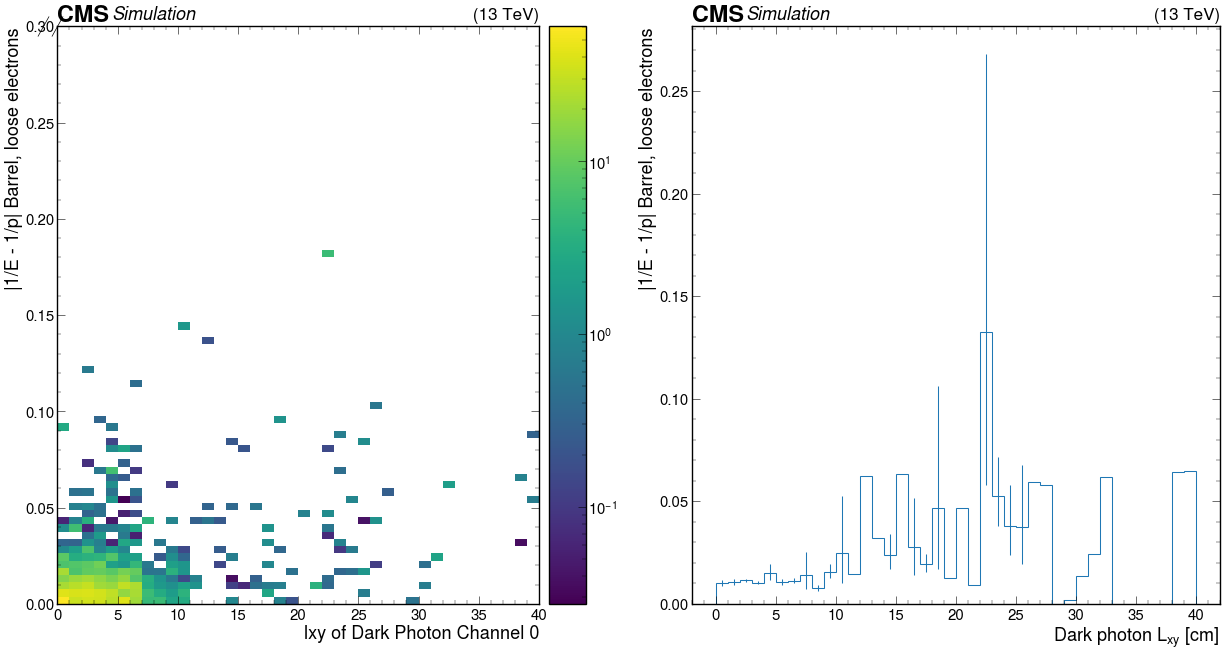

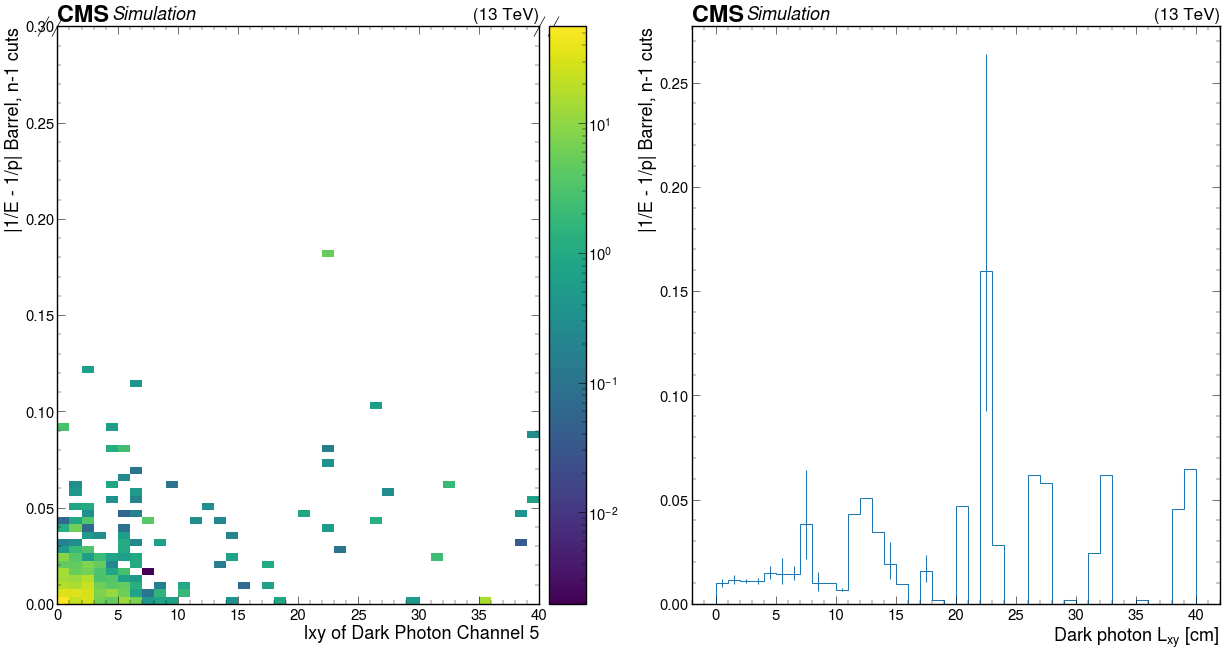

In [6]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("|1/E - 1/p| Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :40j, :].profile(axis="electron_GsfEleEInverseMinusPInverseCut"))  
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 2, sum),:52]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("|1/E - 1/p| Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("|1/E - 1/p| Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :40j, :].profile(axis="electron_GsfEleEInverseMinusPInverseCut"))
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:53]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("|1/E - 1/p| Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[5], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 5")
plt.ylabel("|1/E - 1/p| Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[5], :40j, :].profile(axis="electron_GsfEleEInverseMinusPInverseCut"))  
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(0, 2, sum),:53]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("|1/E - 1/p| Barrel, n-1 cuts")

#(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:])

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'Isolation Barrel, n-1 cuts')

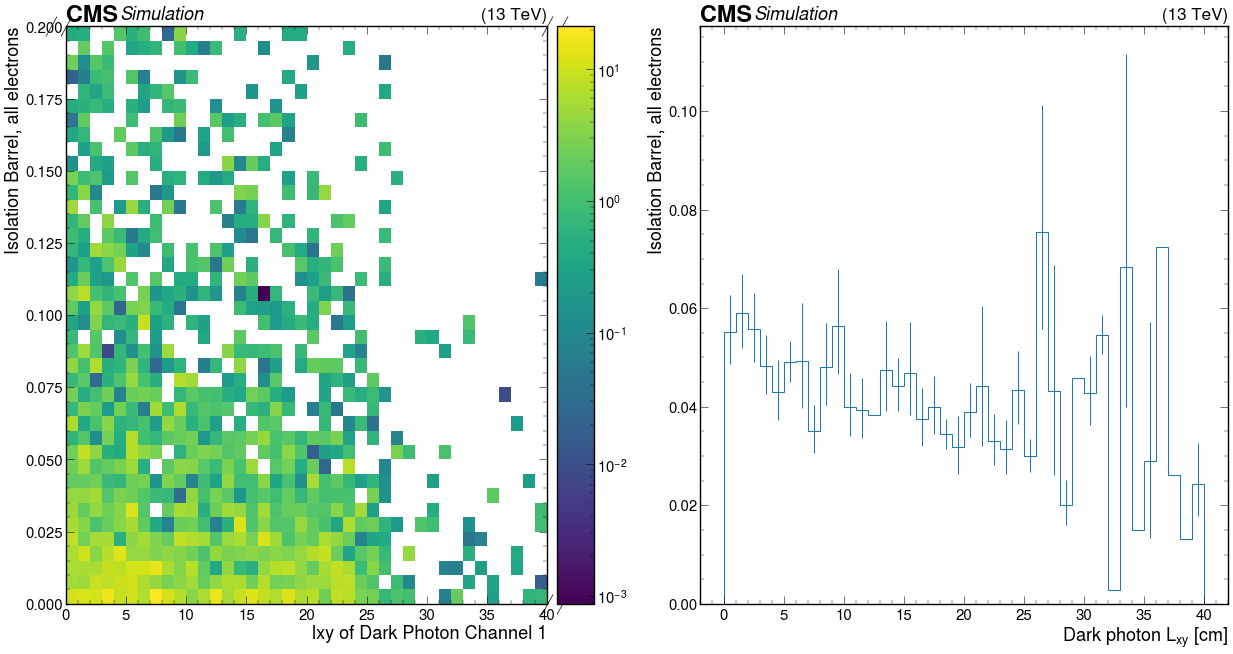

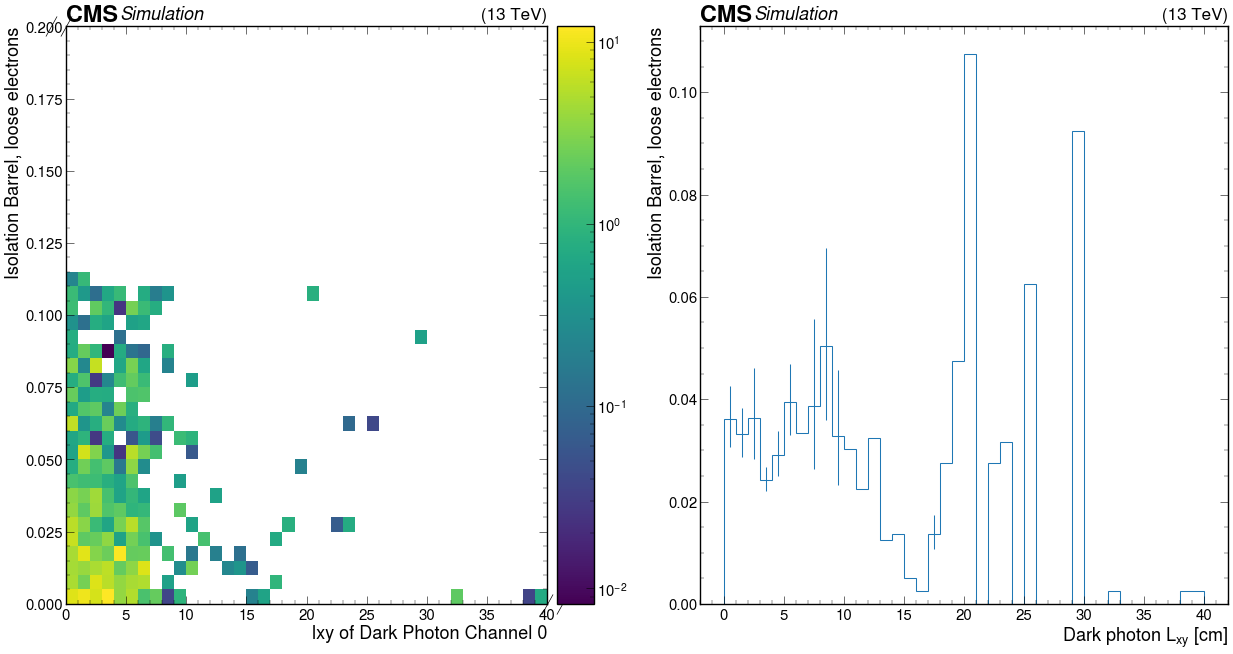

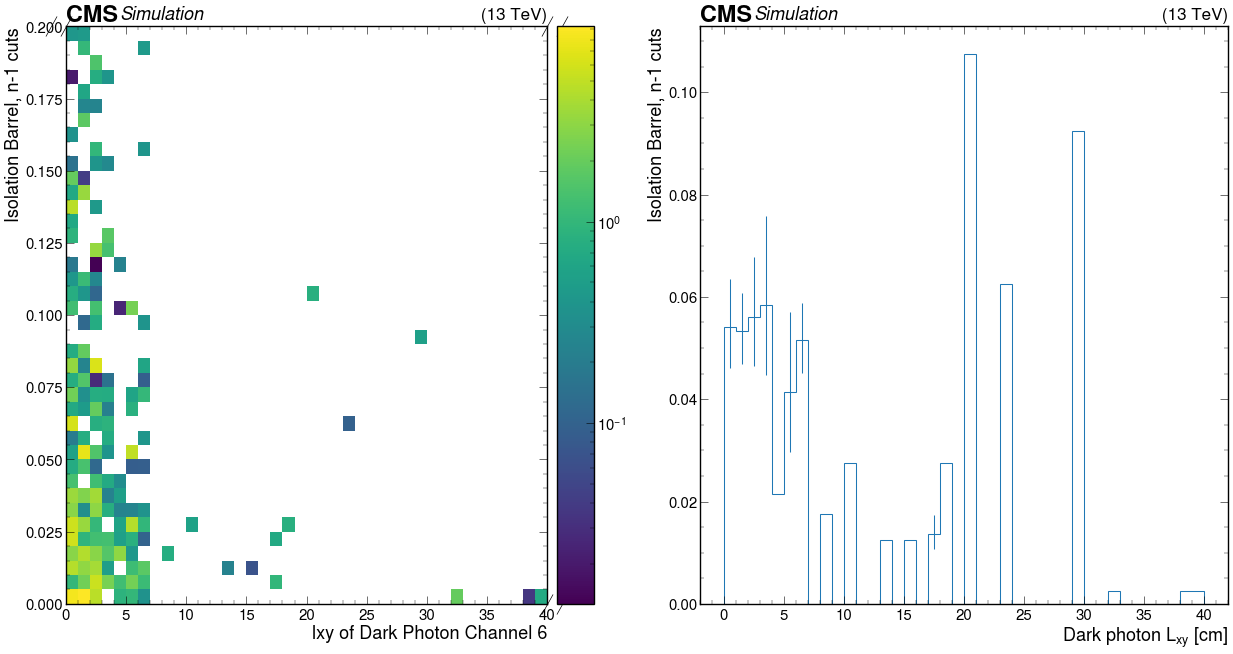

In [7]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Isolation Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :40j, :].profile(axis="electron_GsfEleRelPFIsoScaledCut"))
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3, 101, sum),:22])   
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Isolation Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Isolation Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :40j, :].profile(axis="electron_GsfEleRelPFIsoScaledCut"))
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(0, 2, sum),:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Isolation Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[6], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 6")
plt.ylabel("Isolation Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[6], :40j, :].profile(axis="electron_GsfEleRelPFIsoScaledCut")) 
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2],slice(3, 101, sum),:])   
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Isolation Barrel, n-1 cuts")

#(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(0, 2, sum),:])

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'σiηiη Barrel, n-1 cuts')

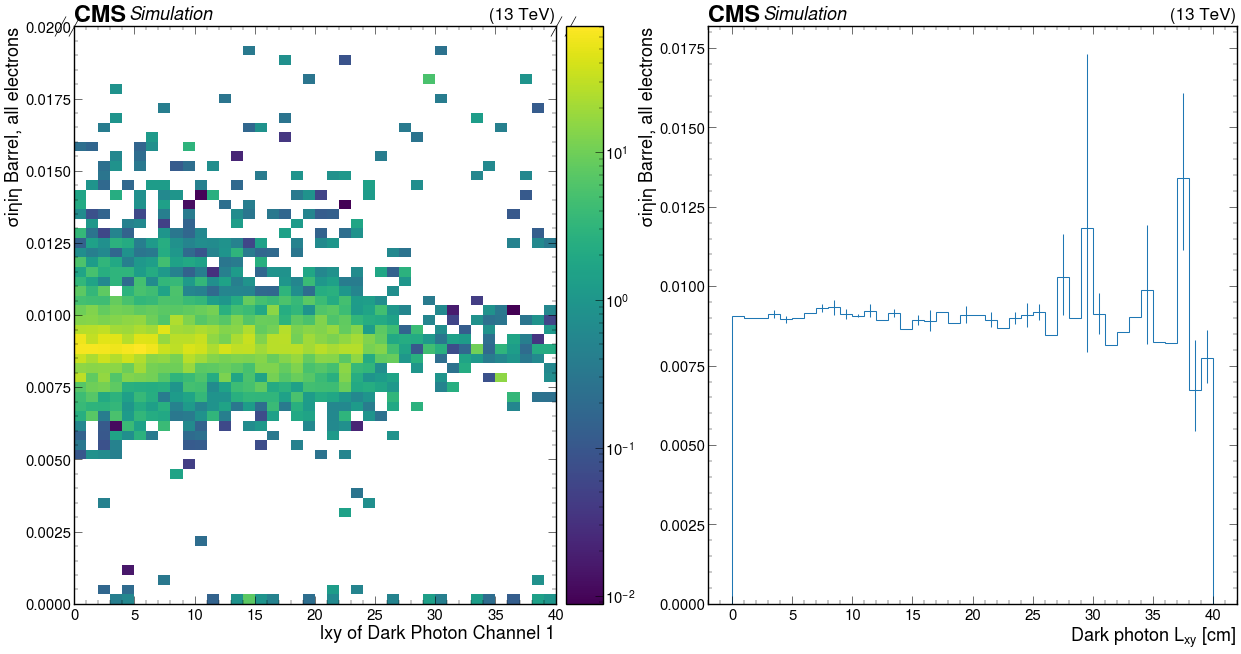

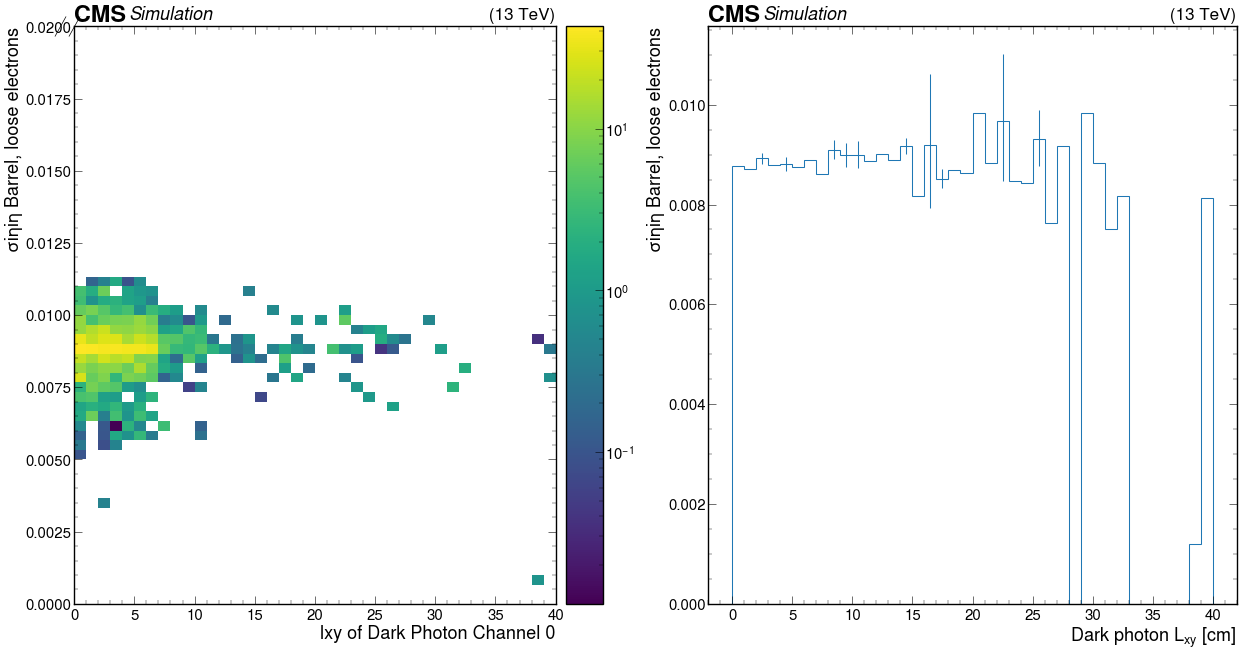

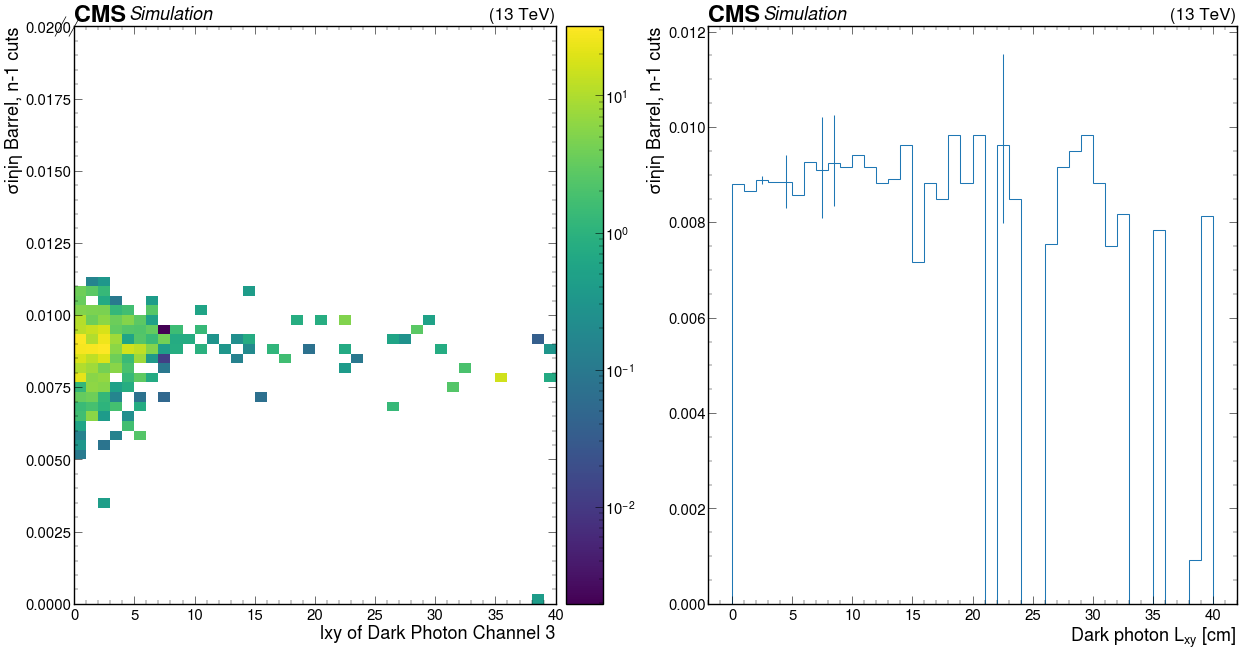

In [8]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("σiηiη Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :40j, :].profile(axis="electron_GsfEleFull5x5SigmaIEtaIEtaCut"))
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 2, sum),:33]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("σiηiη Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("σiηiη Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :40j, :].profile(axis="electron_GsfEleFull5x5SigmaIEtaIEtaCut"))
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:35]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("σiηiη Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("σiηiη Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3], :40j, :].profile(axis="electron_GsfEleFull5x5SigmaIEtaIEtaCut"))
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(0, 2, sum),:35]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("σiηiη Barrel, n-1 cuts")


#(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:])

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'Conversion Veto Barrel n-1 cuts')

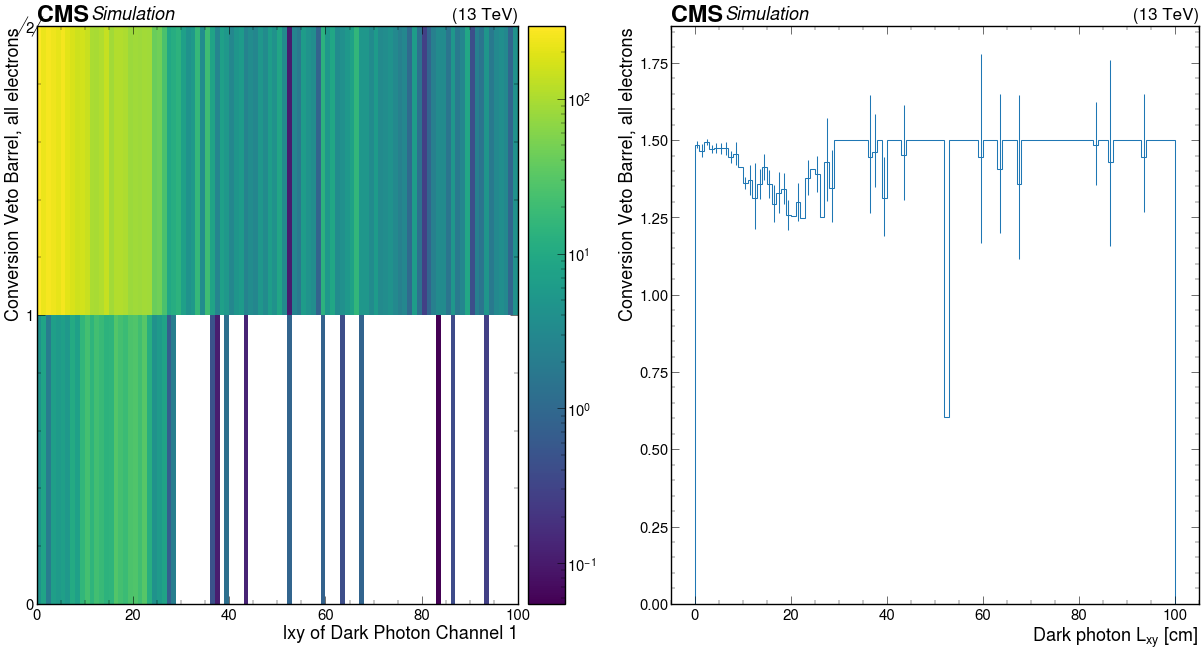

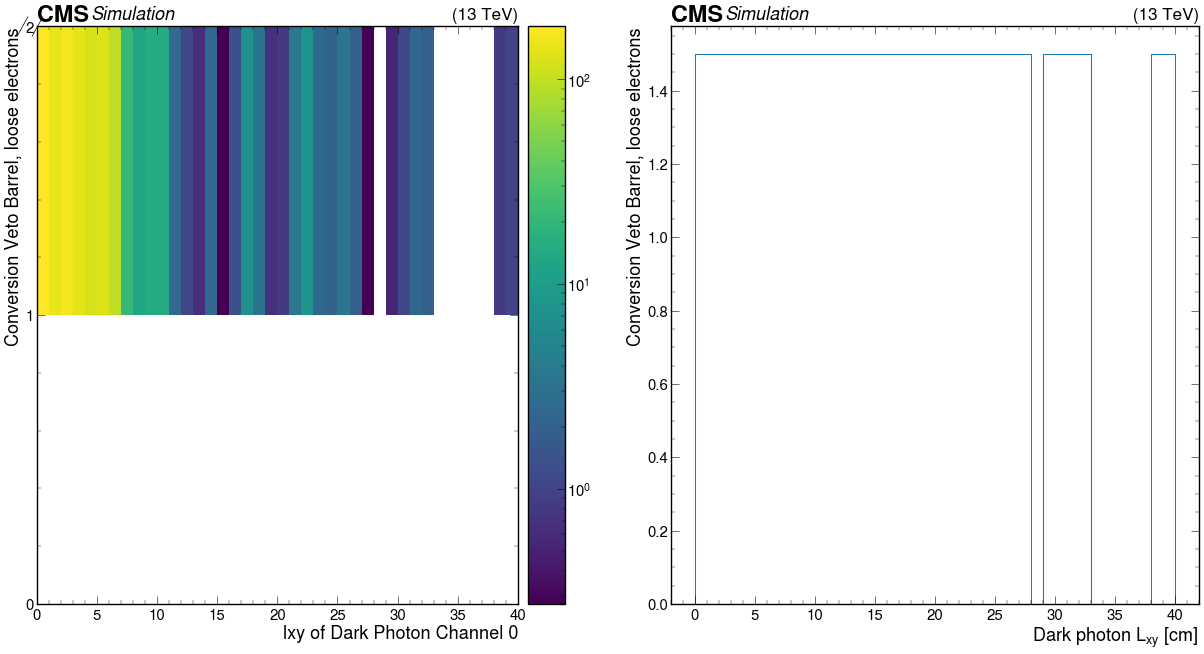

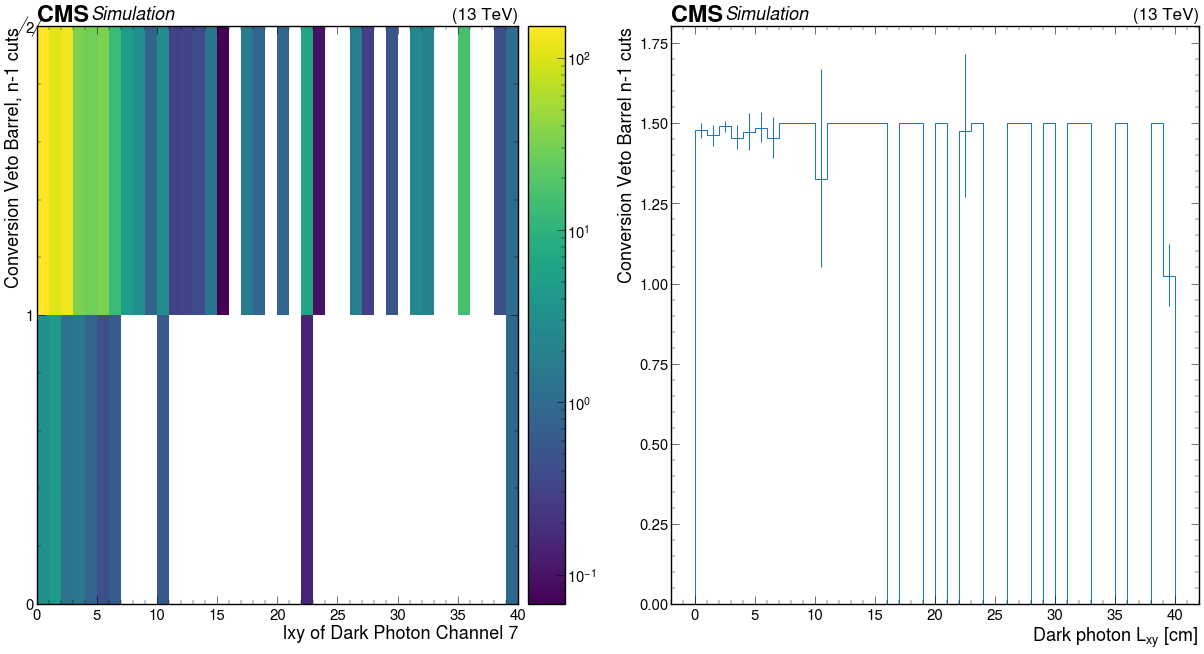

In [9]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :100j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Conversion Veto Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :100j, :].profile(axis="electron_GsfEleConversionVetoCut"))  
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 2, sum),:1]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Conversion Veto Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Conversion Veto Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :40j, :].profile(axis="electron_GsfEleConversionVetoCut"))
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:1]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Conversion Veto Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[7], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 7")
plt.ylabel("Conversion Veto Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[7], :40j, :].profile(axis="electron_GsfEleConversionVetoCut")) 
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[7],slice(0, 2, sum),:1]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Conversion Veto Barrel n-1 cuts")

#(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:])

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

                     ┌───────────────────────────────────────────────────────┐
[ -inf,     0) 0     │                                                       │
[    0, 0.005) 2348  │██████████████████████████████████████████████████████ │
[0.005,  0.01) 63.91 │█▌                                                     │
[ 0.01, 0.015) 193.8 │████▌                                                  │
[0.015,  0.02) 232.5 │█████▍                                                 │
[ 0.02, 0.025) 144.7 │███▍                                                   │
[0.025,  0.03) 128.7 │███                                                    │
[ 0.03, 0.035) 84.89 │██                                                     │
[0.035,  0.04) 80.1  │█▉                                                     │
[ 0.04, 0.045) 59.74 │█▍                                                     │
[0.045,  0.05) 34.53 │▊                                                      │
[ 0.05, 0.055) 26.18 │▋                             

Text(0, 1, 'H/E Barrel, all electrons')

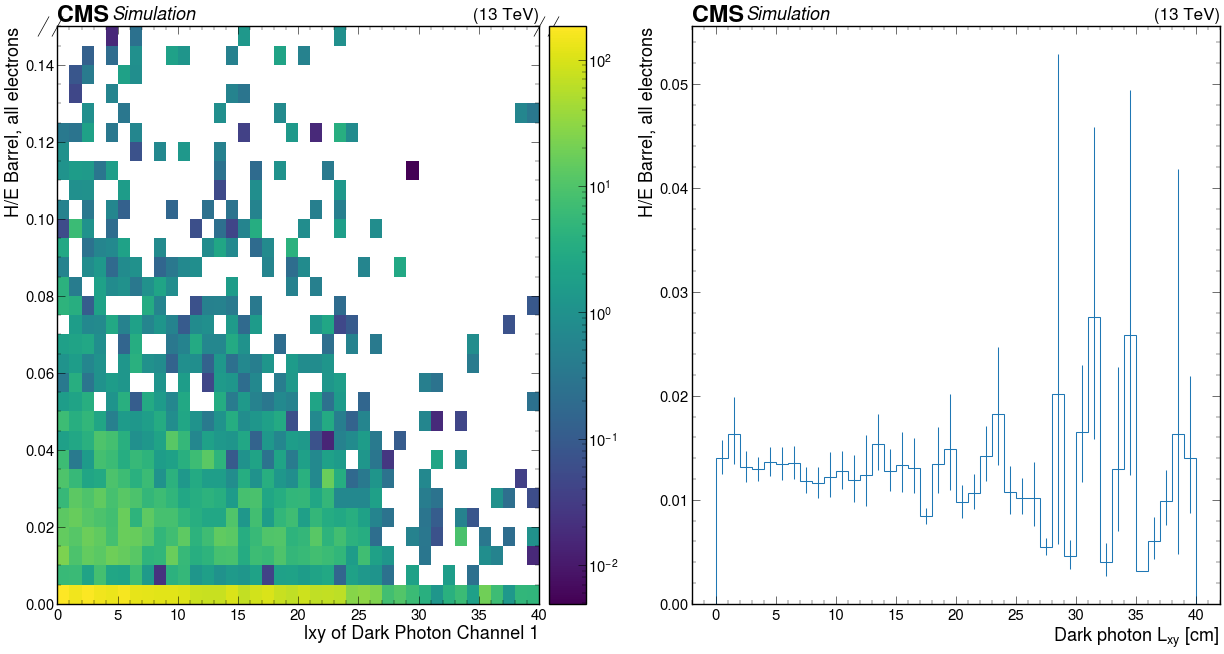

In [10]:
#Unable to define $E_SC$ for the value of H/E and therefor unable to define a bin number for H/E
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("H/E Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :40j, :].profile(axis="electron_GsfEleHadronicOverEMEnergyScaledCut")) 
print(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("H/E Barrel, all electrons")

# Expected missing inner hits:

number of missing hits expected for GSF track.

/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale
/opt/conda/lib/python3.9/site-packages/mplhep/error_estimation.py:49: RuntimeWarning: divide by zero encountered in divide
  counts = sumw / scale


Text(0, 1, 'Expected Missing Hits Barrel, n-1 cuts')

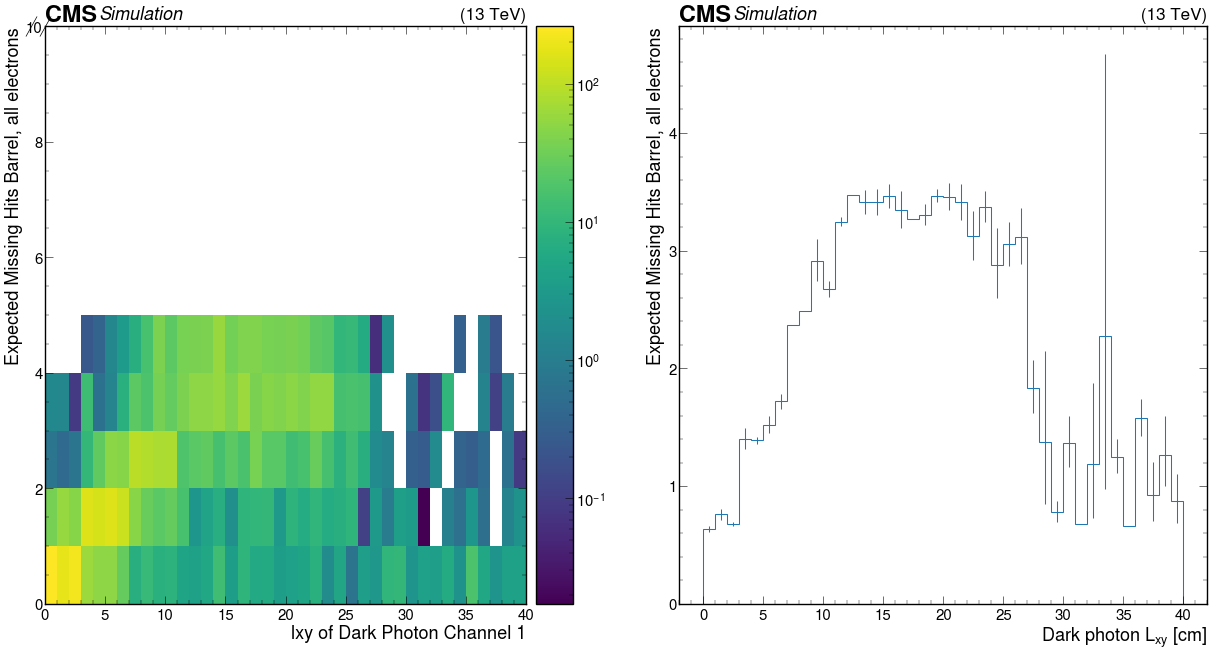

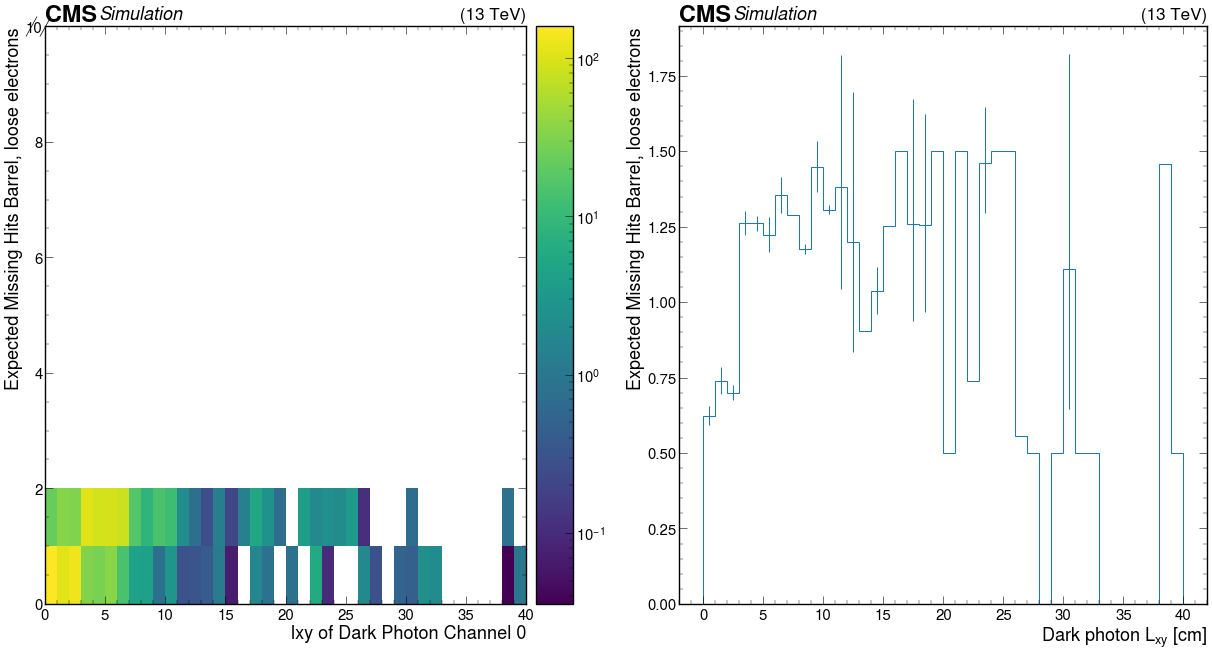

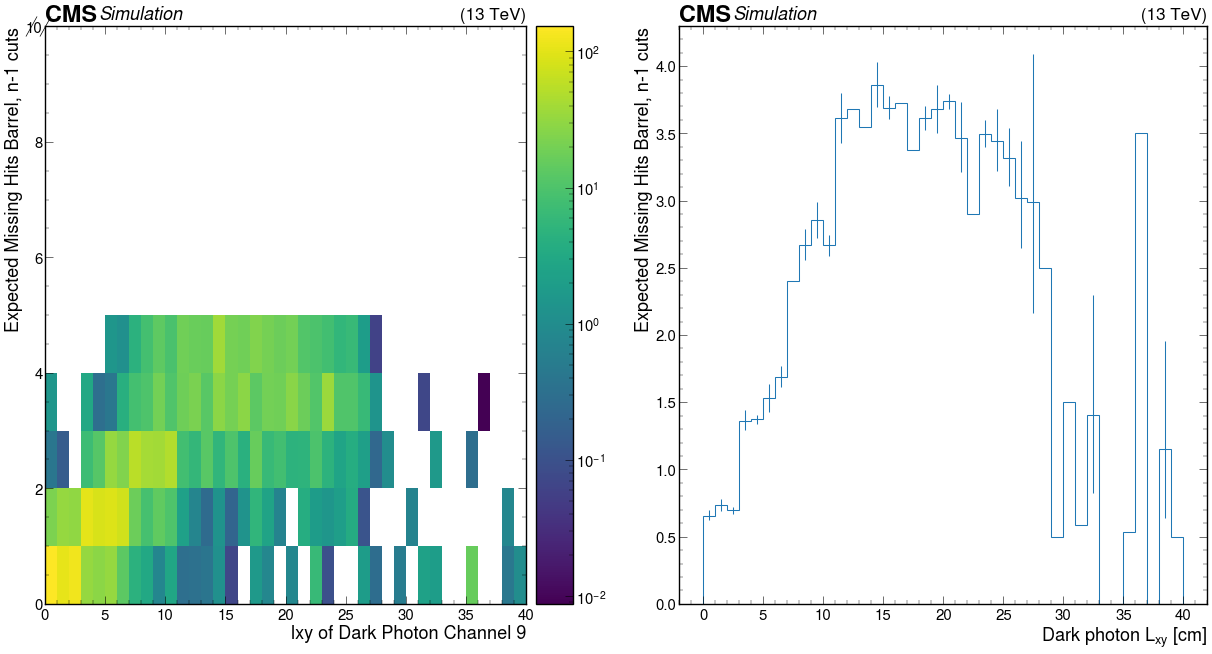

In [11]:
plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Expected Missing Hits Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :40j, :].profile(axis="electron_GsfEleMissingHitsCut"))
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum), 2:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Expected Missing Hits Barrel, all electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Expected Missing Hits Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :40j, :].profile(axis="electron_GsfEleMissingHitsCut"))
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),2:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Expected Missing Hits Barrel, loose electrons")

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[9], :40j, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 9")
plt.ylabel("Expected Missing Hits Barrel, n-1 cuts")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[9], :40j, :].profile(axis="electron_GsfEleMissingHitsCut"))
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[9],slice(0, 2, sum),2:]) 
plt.xlabel("Dark photon $L_{xy}$ [cm]")
plt.ylabel("Expected Missing Hits Barrel, n-1 cuts")

#(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),:])

# Percentages Failed

In [12]:
binnumdict = {
    "electron_GsfEleDEtaInSeedCut2d": 35 ,
    "electron_GsfEleDPhiInCut2d" : 79 ,
    "electron_GsfEleEInverseMinusPInverseCut2d" : 52 ,
    "electron_GsfEleFull5x5SigmaIEtaIEtaCut2d" : 33 ,
    "electron_GsfEleRelPFIsoScaledCut2d" : 22 ,
    "electron_GsfEleConversionVetoCut2d" : 1,
    "electron_GsfEleMissingHitsCut2d" : 3,
}
#binnum come from the bin number assigned in hist.py (about half), and are specifically determined from the analysis note number for each ID variable

lxy = [0,2,3,4,5,6,7,102]
#able to change Lxy
hists =  output["out"]["2Mu2E_100GeV_0p25GeV_10mm"]["hists"]
for histname, binnum in binnumdict.items() : 
    values = output["out"]["2Mu2E_100GeV_0p25GeV_10mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print()
    print(histname)
    for i in range(0,len(lxy)-1):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        if histname == "electron_GsfEleConversionVetoCut2d" :
            fail = values[lxy[i]:lxy[i+1],binnum].sum()
        else: 
            fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)


electron_GsfEleDEtaInSeedCut2d
297.0139734572731 41.663636753335595 14.027500547656594
238.163269035751 33.05123973824084 13.877555456832209
263.39462002867367 54.51617254735902 20.69752698116016
242.4821550428751 45.84349574986845 18.905925568734126
218.85157900769264 50.345992755144835 23.004628517382173
256.6687860345701 57.67817084118724 22.471829057320086
2915.588916631008 1067.7188131880248 36.621034162174844

electron_GsfEleDPhiInCut2d
297.0139734572731 10.325796090066433 3.476535453828353
238.163269035751 9.172900531440973 3.851517729236416
263.39462002867367 18.13995977677405 6.88698948171352
242.4821550428751 15.510097187012434 6.3963870596044385
218.85157900769264 17.07025731354952 7.799924218481193
256.6687860345701 17.211147697642446 6.705586590230851
2915.588916631008 418.43258666212205 14.351563221938196

electron_GsfEleEInverseMinusPInverseCut2d
297.0139734572731 0.6851304545998573 0.23067280189711906
238.163269035751 0.2563181519508362 0.10762287274128737
263.39462002